In [1]:
!ls data

sample_submission.csv  test.csv  train.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
imgs = {}

for _, row in df.iterrows():
    label = row[0]
    data = row[1:]

    if label not in imgs:
        imgs[label] = []
        
    imgs[label].append(data.to_numpy(dtype=np.uint8).reshape((28, 28)))

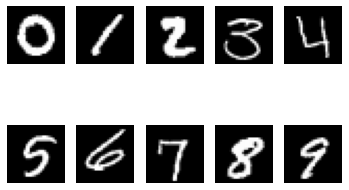

In [5]:
_, axes = plt.subplots(2, 5)

for label, ax in enumerate(axes.flatten()):
    ax.imshow(imgs[label][0], cmap='gray')
    ax.axis('off')

plt.show()

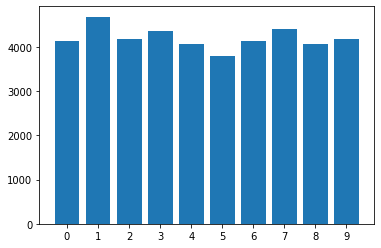

In [6]:
plt.bar(range(10), [len(imgs[label]) for label in range(10)])

plt.xticks(range(10))

plt.show()